In [29]:
#라이브러리 불러오기
import numpy as np
import pandas as pd

In [2]:
3+4

7

In [3]:
#시각화용 라이브러리
#matplotlib기반의 통계 기능이 내장된 하이레벨의 시각화 라이브러리
import seaborn as sns

In [4]:
3+4

7

In [5]:
import matplotlib.pyplot as plt

In [6]:
import matplotlib.font_manager as fm
from matplotlib import rc

In [7]:
#한글 폰트 처리용
font = fm.FontProperties(fname='/System/Library/Fonts/Supplemental/AppleGothic.ttf',size=25).get_name()
rc('font',family=font)

In [8]:
#https://github.com/mwaskom/seaborn-data/blob/master/tips.csv
#자동완성 코드 : tab
df = sns.load_dataset('tips') #내장된 샘플 데이터파일 로드 => 데이터프레임으로 변환됨

In [9]:
df.shape

(244, 7)

In [10]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [11]:
df.info() #각 컬럼의 정보(NaN데이터 존재여부, 컬럼의 dType)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [12]:
#컬럼명 출력
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [13]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [14]:
#결측치 보기
df.isnull().sum() #모두 0임으로 모든 컬럼에 결측치가 없다.

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [15]:
#특정 컬럼에 결측치 여부 보기
df['tip'].isnull().sum()

0

## 판다스의 plot()함수로 시각화

<AxesSubplot:>

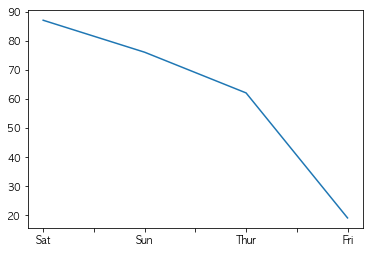

In [16]:
#day 컬럼에 요소 몇개인지 확인 value_counts()
df['day'].value_counts().plot()

<AxesSubplot:>

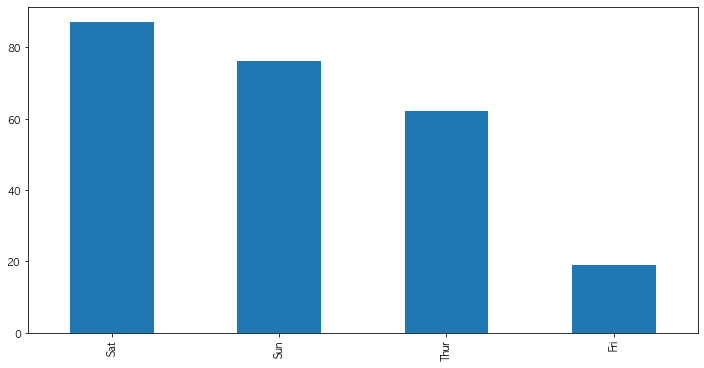

In [17]:
df['day'].value_counts().plot.bar(figsize=(12,6))

array([[<AxesSubplot:title={'center':'total_bill'}>,
        <AxesSubplot:title={'center':'tip'}>],
       [<AxesSubplot:title={'center':'size'}>, <AxesSubplot:>]],
      dtype=object)

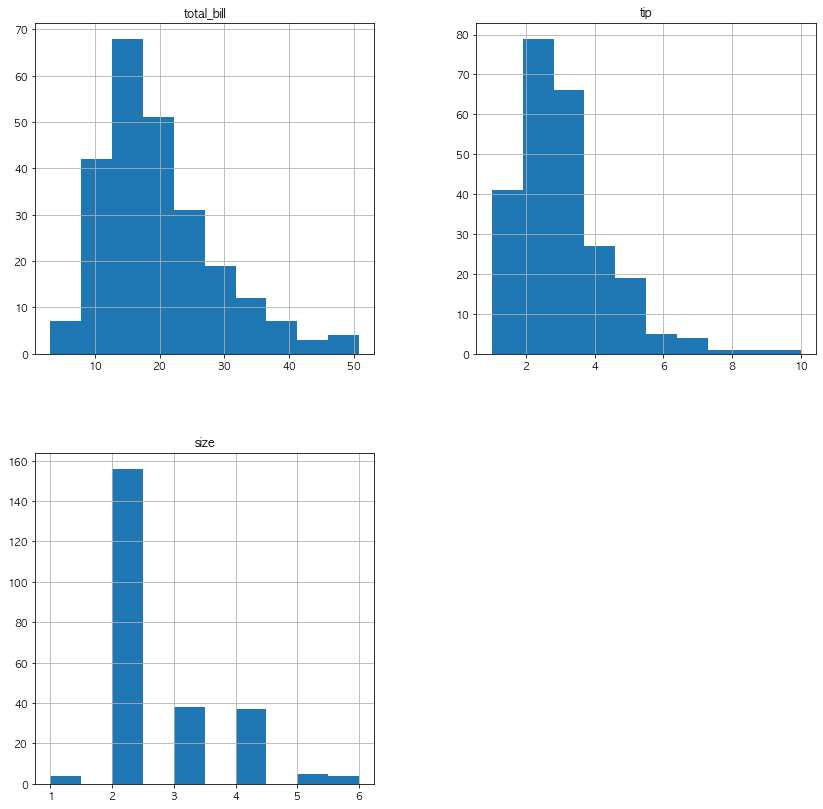

In [18]:
#100만개가 넘는 데이터를 시각화할 때는 시각화하는 속도가 느리기 때문에 grupby 또는 privot_table로
#연산을 하여 시각화하거나 필요한 데이터만 추출해서 시각화 하자
#df.plot(kind='hist') 수치형 데이터 표시
#df.plot(kind='hist') #df.plot.hist() or df.hist()
df.hist(figsize=(14,14))

<AxesSubplot:>

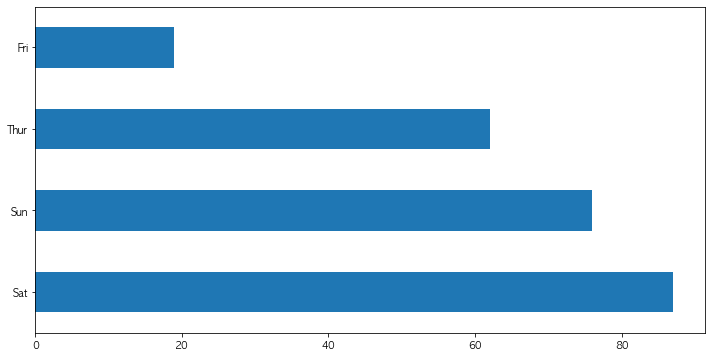

In [19]:
df['day'].value_counts().plot(figsize=(12,6),kind='barh')

array([[<AxesSubplot:title={'center':'total_bill'}>,
        <AxesSubplot:title={'center':'tip'}>]], dtype=object)

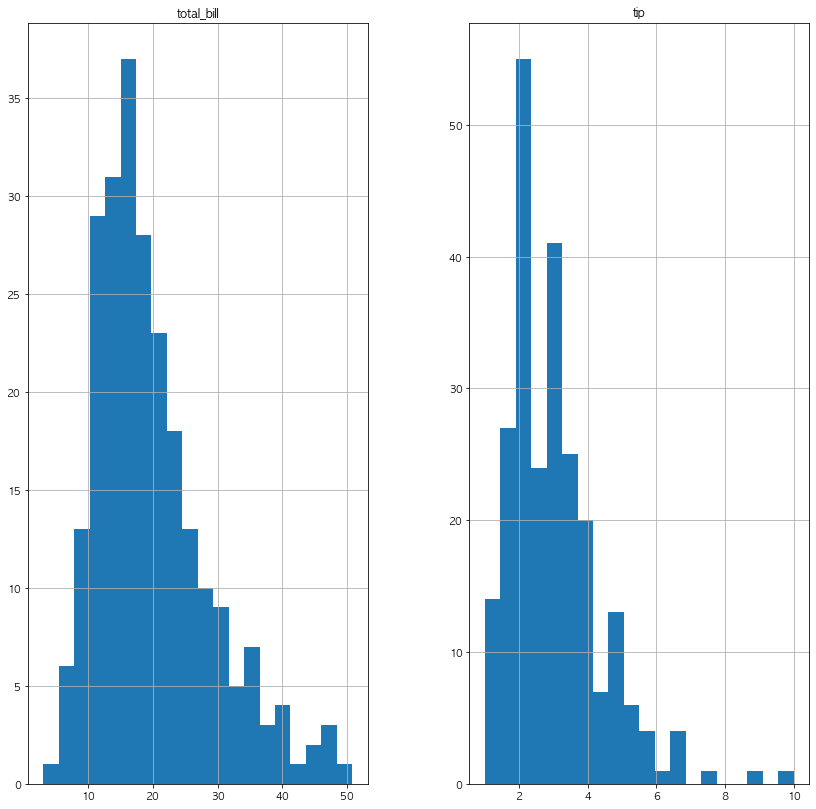

In [20]:
#슬라이싱을 해서 특정한 행, 열을 선택해서 그리기.
#total_bill컬럼과 tip컬럼만 hist그램으로 그리기(연속형의 수치 데이타임으로)
df.iloc[:,:2].hist(figsize=(14,14),bins=20)

<AxesSubplot:>

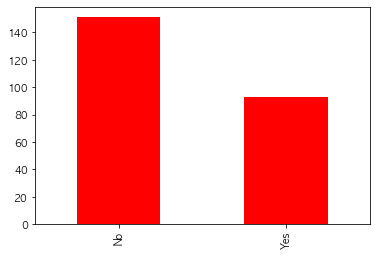

In [21]:
df['smoker'].value_counts().plot.bar(color='r') #범주형의 빈도수임으로 막대그래프

## Seaborn으로 시각화
### countplot() : 1차원 데이터이면서 범주형 데이터 시각화

### 범주형별로 빈도수를 계산해서 막대 그래프로 시각화
### x혹은 y중 하나만 지정한다.
### countplot(x='범주형 컬럼명',data=데이터프레임 혹은 시리즈) 내부적으로 지정한 컬럼에 대해 빈도수를 구한다 즉 (value_counts()를 사용할 필요가 없다.)

<AxesSubplot:title={'center':'흡연자 구성비'}, xlabel='smoker', ylabel='count'>

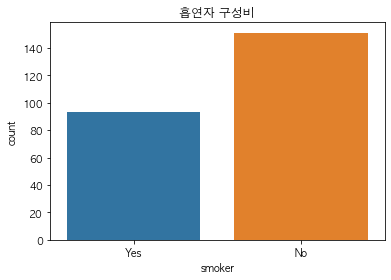

In [22]:
plt.title('흡연자 구성비')
sns.countplot(x='smoker',data=df) 
#df['smoker'].value_counts().plot.bar()

<AxesSubplot:xlabel='sex', ylabel='count'>

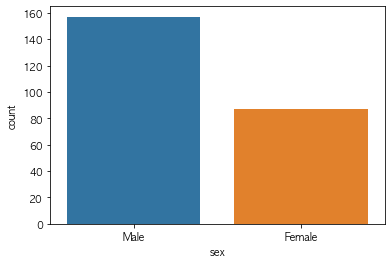

In [23]:
sns.countplot(x='sex',data=df) 

<AxesSubplot:xlabel='day', ylabel='count'>

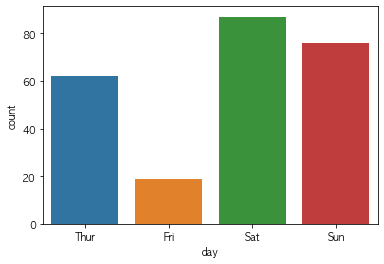

In [24]:
sns.countplot(x='day',data=df) #토요일이 지출이 가장 많았다.
#데이터프레임의 plot함수
#df['day'].value_counts().plot.bar()

<AxesSubplot:xlabel='day', ylabel='count'>

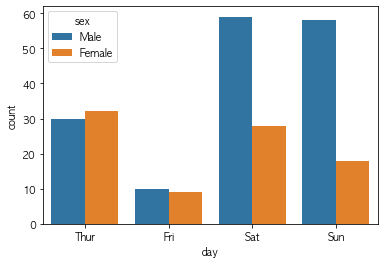

In [25]:
#hue인자에 범주형 컬럼 : 범주형 데이터별(남성,여성)로 x에 지정한 컬럼데이터별로
#빈도수를 시각화
#각 요일별 남성과 여성의 팁 지출 횟수
sns.countplot(x='day',data=df,hue='sex')

## barplot : 수치형과 범주형 데이터 시각화
### 수치형 데이터의 평균을 구해서 막대로 표시해준다
### 예를들면 x가 'day'이고 y가 'tip'이라면
### day별로 tip의 평균을 구해서 막대로 시각화.
### 데이터가 많은 경우 속도가 느리다.
### 막대위에 선은 신뢰구간(95%) ci="sd"를 추가시 표준편차 기준, ci=None을 주면
### 신뢰구간을 그리지 않는다 즉 속도가 빠르다

<AxesSubplot:xlabel='day', ylabel='tip'>

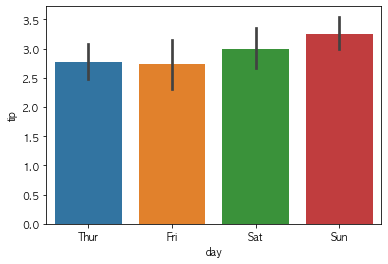

In [27]:
sns.barplot(x='day',y='tip',data=df) #평균이 default

<AxesSubplot:xlabel='day', ylabel='tip'>

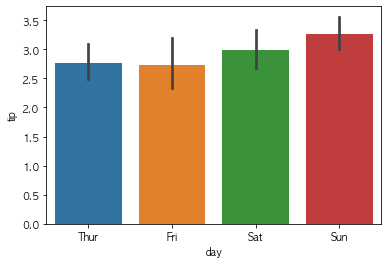

In [30]:
sns.barplot(x='day',y='tip',data=df,estimator=np.mean) #위와 같다

<AxesSubplot:xlabel='day', ylabel='tip'>

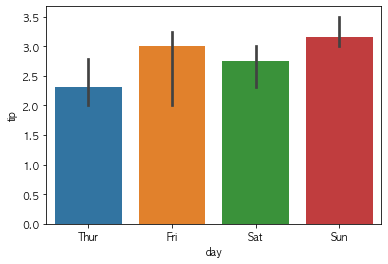

In [31]:
sns.barplot(x='day',y='tip',data=df,estimator=np.median) #막대의 높이를 평균이 아니라 중앙값으로 변경

<AxesSubplot:xlabel='day', ylabel='tip'>

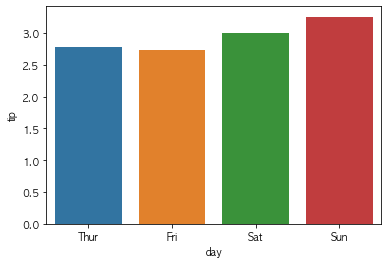

In [32]:
sns.barplot(x='day',y='tip',data=df,ci=None) #신뢰구간을 그리지 않음

<AxesSubplot:xlabel='day', ylabel='tip'>

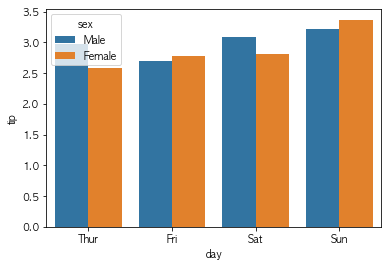

In [33]:
sns.barplot(x='day',y='tip',data=df,ci=None,hue='sex') #신뢰구간을 그리지 않음

### lineplot : barplot과 사용법 동일
#### 주로 시계열 데이터등을 시각화 즉 주식 가격변동 데이터 시각화시 주로 사용
#### 신뢰구간이나 편차는 그림자로 표시

<AxesSubplot:xlabel='day', ylabel='total_bill'>

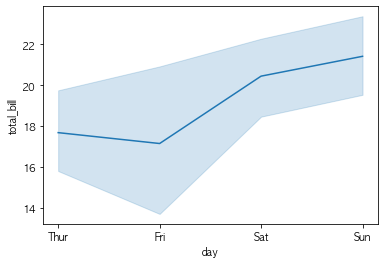

In [34]:
sns.lineplot(data=df,x='day',y='total_bill') 

<AxesSubplot:xlabel='day', ylabel='total_bill'>

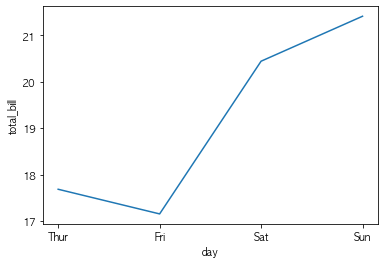

In [35]:
sns.lineplot(data=df,x='day',y='total_bill',ci=None) #신뢰구간 안 그림

<AxesSubplot:xlabel='day', ylabel='total_bill'>

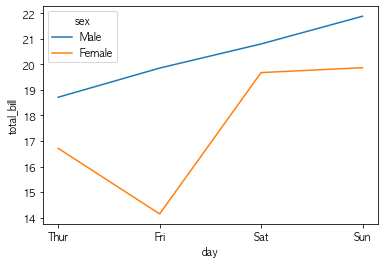

In [36]:
sns.lineplot(data=df,x='day',y='total_bill',ci=None,hue='sex') 

## pointplot : barplot과 사용법 동일
### 점(point)으로 데이터 표시
### 신뢰구간이나 편차는 막대로 표시

<AxesSubplot:xlabel='day', ylabel='total_bill'>

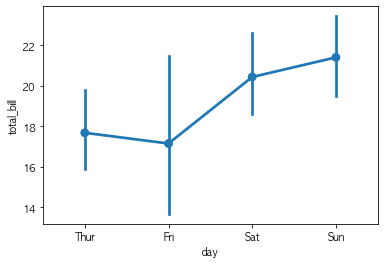

In [38]:
sns.pointplot(data=df,x='day',y='total_bill')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

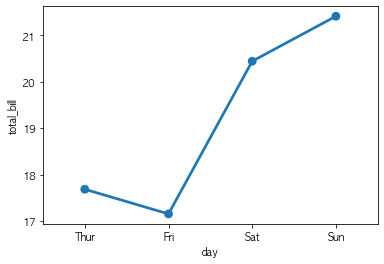

In [39]:
sns.pointplot(data=df,x='day',y='total_bill',ci=None)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

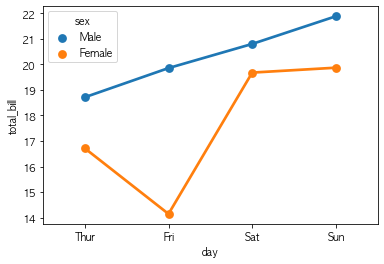

In [40]:
sns.pointplot(data=df,x='day',y='total_bill',ci=None,hue='sex')

## rugplot : 1차원 벡터형태의 실수값 사용. 작은 성분(rug)으로 height에 지정한 동일한 길이로 실제 데이트들의 위치만을 표시
### 작은 선분(rug)으로 X축에 지정 
### 동일한 길이로 실제 데이터들의 위치만을 표시.
### 데이터의 밀집구간 파악 용이

In [41]:
total_bill = df['total_bill'].values

In [46]:
total_bill # 넘파이 배열 total_bill.max() 

3.07

<AxesSubplot:>

/Users/bagdaemin/opt/anaconda3/envs/DataAnalysis/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/bagdaemin/opt/anaconda3/envs/DataAnalysis/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


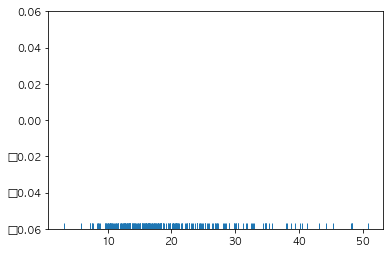

In [51]:
sns.rugplot(total_bill) #10달러에서 20달러 사이의 총 지출이 많음

### kdeplot : 데이터가 연속형인 실수값 시각화
#### kernel density estimation 의 약자. 확률 밀도를 추정
#### 히스토그램보다 부드러운 형태의 분포 곡선을 표시
#### 2개의 1차원 실수값 사용시 2차원 확률밀도 그래프

<AxesSubplot:ylabel='Density'>

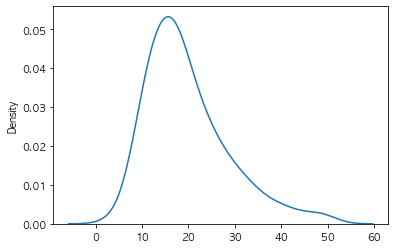

In [52]:
# 각 총 지출에 대한 확률
sns.kdeplot(total_bill)

In [62]:
tip = df.tip.values

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

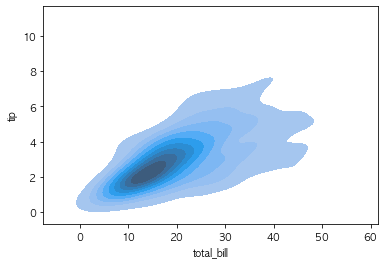

In [66]:
sns.kdeplot(x='total_bill',y='tip',data=df,shade=True)

### distplot : 히스토그램과 kdeplot을 동시에 시각화
#### rug와 kernel density 표시 기능도 있다
#### 결측치가 있는 경우 시각화 오류
#### 데이터는 Series, 1d-array, or list

/Users/bagdaemin/opt/anaconda3/envs/DataAnalysis/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/bagdaemin/opt/anaconda3/envs/DataAnalysis/lib/python3.9/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

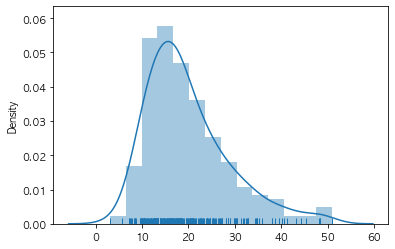

In [75]:
sns.distplot(a=total_bill,rug=True)

/Users/bagdaemin/opt/anaconda3/envs/DataAnalysis/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

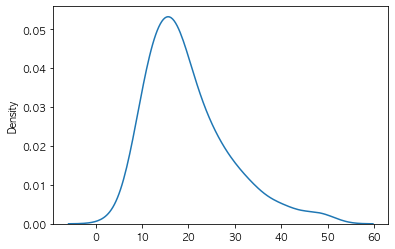

In [77]:
sns.distplot(a=total_bill,hist=False)  #kdeplot과 같다

## Jointplot : 데이터프레임에만 사용, 데이터가 모두 실수값인 경우


### scatter plot뿐 아니라 그래프의 가장자리에 각 변수의 히스토그램도 표시

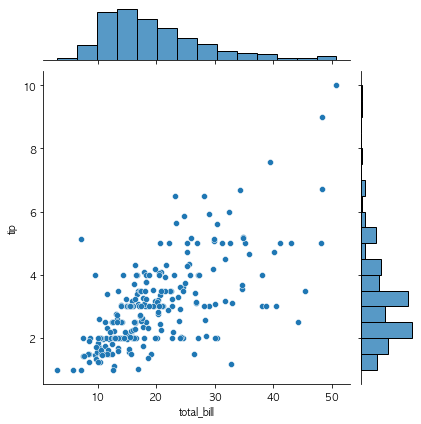

In [79]:
sns.jointplot(x='total_bill',y='tip',data=df)

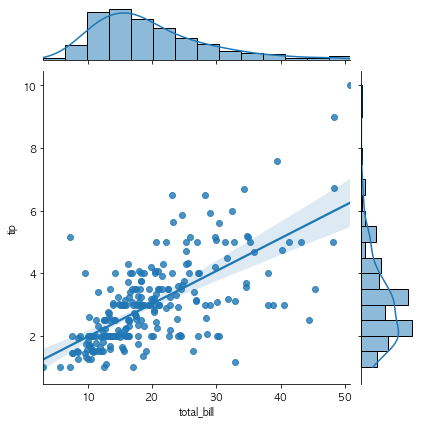

In [80]:
sns.jointplot(x='total_bill',y='tip',data=df,kind='reg') #kind 디폴트는 scatter

### heatmap : 데이터가 실수형 혹은 범주형(카테고리화된 숫자)인경우

In [83]:
df_corr = df.corr()
df_corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [85]:
df_corr['tip'].sort_values()

size          0.489299
total_bill    0.675734
tip           1.000000
Name: tip, dtype: float64

<AxesSubplot:>

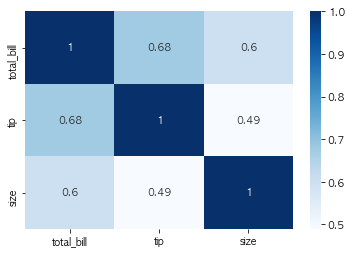

In [88]:
sns.heatmap(data=df_corr,annot=True,cmap='Blues')

### boxplot
#### Boxplot은 박스와 박스 바깥의 선(whisker)으로 이루어진 그래프로 아웃라이어(outlier)발견이 쉽다

<AxesSubplot:xlabel='day', ylabel='total_bill'>

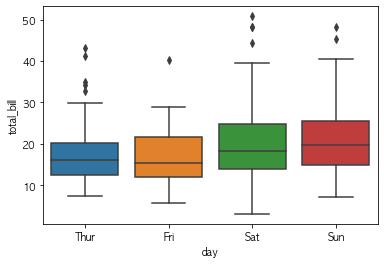

In [89]:
#x축은 범주형, y축은 수치형
sns.boxplot(x='day',y='total_bill',data=df)

In [94]:
df_thur = df[df['day']=='Thur']

In [96]:
df_thur.describe()

,total_bill,tip,size
count,62.000000,62.000000,62.000000
mean,17.682742,2.771452,2.451613
std,7.886170,1.240223,1.066285
min,7.510000,1.250000,1.000000
25%,12.442500,2.000000,2.000000
50%,16.200000,2.305000,2.000000
75%,20.155000,3.362500,2.000000
max,43.110000,6.700000,6.000000


In [97]:
df_thur['total_bill'].median() #목요일의 total_bill(총 지출) 중앙값

16.2

In [100]:
df_thur[df_thur['total_bill'].values>30] #목요일에 이상치(총지출)에 해당하는 행들만 출력

,total_bill,tip,sex,smoker,day,time,size
83,32.68,5.00,Male,Yes,Thur,Lunch,2
85,34.83,5.17,Female,No,Thur,Lunch,4
141,34.30,6.70,Male,No,Thur,Lunch,6
142,41.19,5.00,Male,No,Thur,Lunch,5
197,43.11,5.00,Female,Yes,Thur,Lunch,4


In [101]:
df_thur_outlier=df_thur[df_thur['total_bill'].values>30]

In [102]:
df_thur_outlier.index #행인덱스

Int64Index([83, 85, 141, 142, 197], dtype='int64')

In [103]:
#목요일의 이상치 데이터 제거
#drop() 함수로 과도하게 총 지출한 행 제거
df_thur.drop(df_thur_outlier.index)

,total_bill,tip,sex,smoker,day,time,size
77,27.20,4.00,Male,No,Thur,Lunch,4
78,22.76,3.00,Male,No,Thur,Lunch,2
79,17.29,2.71,Male,No,Thur,Lunch,2
80,19.44,3.00,Male,Yes,Thur,Lunch,2
81,16.66,3.40,Male,No,Thur,Lunch,2
82,10.07,1.83,Female,No,Thur,Lunch,1
84,15.98,2.03,Male,No,Thur,Lunch,2
86,13.03,2.00,Male,No,Thur,Lunch,2
87,18.28,4.00,Male,No,Thur,Lunch,2
88,24.71,5.85,Male,No,Thur,Lunch,2


In [119]:
#금요일의 total_bill 컬럼보기 
df_fri = df[df['day']=='Fri']

In [126]:
df_fri = df_fri.drop(df_fri[df_fri['total_bill']>=30].index)

In [125]:
df_fri

,total_bill,tip,sex,smoker,day,time,size
90,28.97,3.00,Male,Yes,Fri,Dinner,2
91,22.49,3.50,Male,No,Fri,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2
93,16.32,4.30,Female,Yes,Fri,Dinner,2
94,22.75,3.25,Female,No,Fri,Dinner,2
96,27.28,4.00,Male,Yes,Fri,Dinner,2
97,12.03,1.50,Male,Yes,Fri,Dinner,2
98,21.01,3.00,Male,Yes,Fri,Dinner,2
99,12.46,1.50,Male,No,Fri,Dinner,2
100,11.35,2.50,Female,Yes,Fri,Dinner,2
